## CUSTOMER CHURN

Customer churn is the percentage of customers that stopped using any company's product or service during a certain time frame.

In terms of telecommunication the customers leaving the current telecom company and moving into another is called as telecom churn.

Customer churn is a big problem for many companies.
Acquiring a new customer is anywhere from 5 to 25 times more expensive than retaining an existing one. 
In Telecom Churn Analysis  we analyze customer behavior, try to predict churn & provide measures to stop it.
With the help of data we will derive the meaningful insights & help the company to reduce churn rate.

Churn types:  
1) Voluntary churn  
2) Involuntary churn

-- Voluntary churn occurs due to a decision by the customer to switch to another company or service provider.

-- Involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. 

We will concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. 

Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

### IMPORTING RELEVENT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

##### Reading the dataset

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Number of Rows : " ,df.shape[0])
print ("Number of Columns : " ,df.shape[1])

Number of Rows :  7043
Number of Columns :  21


In [5]:
print ("List of all columns : \n" ,df.columns.tolist())


List of all columns : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
print ("Missing values :  ", df.isnull().values.sum())

Missing values :   0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Data Manipulation

#Replacing spaces with null values in total charges column

df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [10]:
df['TotalCharges'].isnull().sum()

11

In [11]:
df= df.dropna()

In [12]:
df['TotalCharges'].isnull().sum()

0

In [13]:
df = df.reset_index()[df.columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [15]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [16]:
df["MultipleLines"].replace(["No phone service"],["No"],inplace = True)

In [17]:
col = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in col:
    df[i]=df[i].replace({"No internet service" : 0,"Yes" : 1,"No" : 0})


In [18]:
#replace 'No internet service' to No for the following columns
df[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].head(13)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0
5,0,0,1,0,1,1
6,0,1,0,0,1,0
7,1,0,0,0,0,0
8,0,0,1,1,1,1
9,1,1,0,0,0,0


### Tenure into groups 

In [19]:
def time(df):
    if df["tenure"] <= 12:
        return " T_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] < 24):
        return "T_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "T_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "T_48-60"
    elif df["tenure"] > 60 :
        return "T > 60"
    
    
df["tenure_group"] = df.apply(lambda df: time(df),axis = 1)

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,T_0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,0,0,0,One year,No,Mailed check,56.95,1889.50,No,T_24-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,T_0-12
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,T_24-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,T_0-12


In [21]:
# sns.set(rc={'figure.figsize':(8,8)})

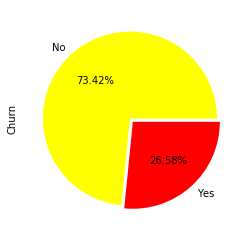

In [22]:
df["Churn"].value_counts().plot(kind= "pie", autopct='%1.2f%%', colors= ["yellow","red"],explode = (0,0.05))

In [23]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,T_0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,0,0,0,One year,No,Mailed check,56.95,1889.50,No,T_24-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,T_0-12
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,T_24-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,T_0-12
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,0,...,0,1,1,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,T_0-12
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,0,...,0,1,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,T_12-24
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,1,...,0,0,0,Month-to-month,No,Mailed check,29.75,301.90,No,T_0-12
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,0,...,1,1,1,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,T_24-48
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,1,...,0,0,0,One year,No,Bank transfer (automatic),56.15,3487.95,No,T > 60


##### preprocessing

In [24]:
# Assigning variable to customer_id column for future use
user_id = ['customerID']

# dropping customer_id and tenure group
df = df.drop(columns = ["customerID"])
df = df.drop(columns = ["tenure_group"])

In [25]:
# Assigning name to churn column because we dont want it in categorical variable

target = ["Churn"]

In [26]:
# Categorical columns  ==> unique values less than 7

cat_col   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_col   = [x for x in cat_col if x not in target]

cat_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [27]:
 #numerical columns

num_col = [x for x in df.columns if x not in cat_col + target + user_id]
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [28]:
#Binary columns with 2 values
bin_col   = df.nunique()[df.nunique() == 2].keys().tolist()

In [29]:
bin_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [30]:
#Label encoding Binary columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bin_col :
    df[i] = le.fit_transform(df[i])

In [31]:
df.head(12)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [32]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [33]:
#Columns more than 2 values
multi_col = [i for i in cat_col if i not in bin_col]

In [34]:
multi_col

['InternetService', 'Contract', 'PaymentMethod']

In [35]:
# getting dummies for multicols 

df = pd.get_dummies(data = df,columns = multi_col )

In [36]:
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,1,0,0,1,62,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [37]:
df = df.drop(columns = ["Contract_Two year","InternetService_No","PaymentMethod_Mailed check"])

In [38]:
from sklearn.preprocessing import StandardScaler


std = StandardScaler()
scaled = pd.DataFrame(std.fit_transform(df[num_col]),columns= num_col)
df = df.drop(columns = num_col,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,0,1,1,0,0,...,1,0,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,1,0,1,1,...,1,0,0,1,1,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,-1.239504,0.196178,-0.940457


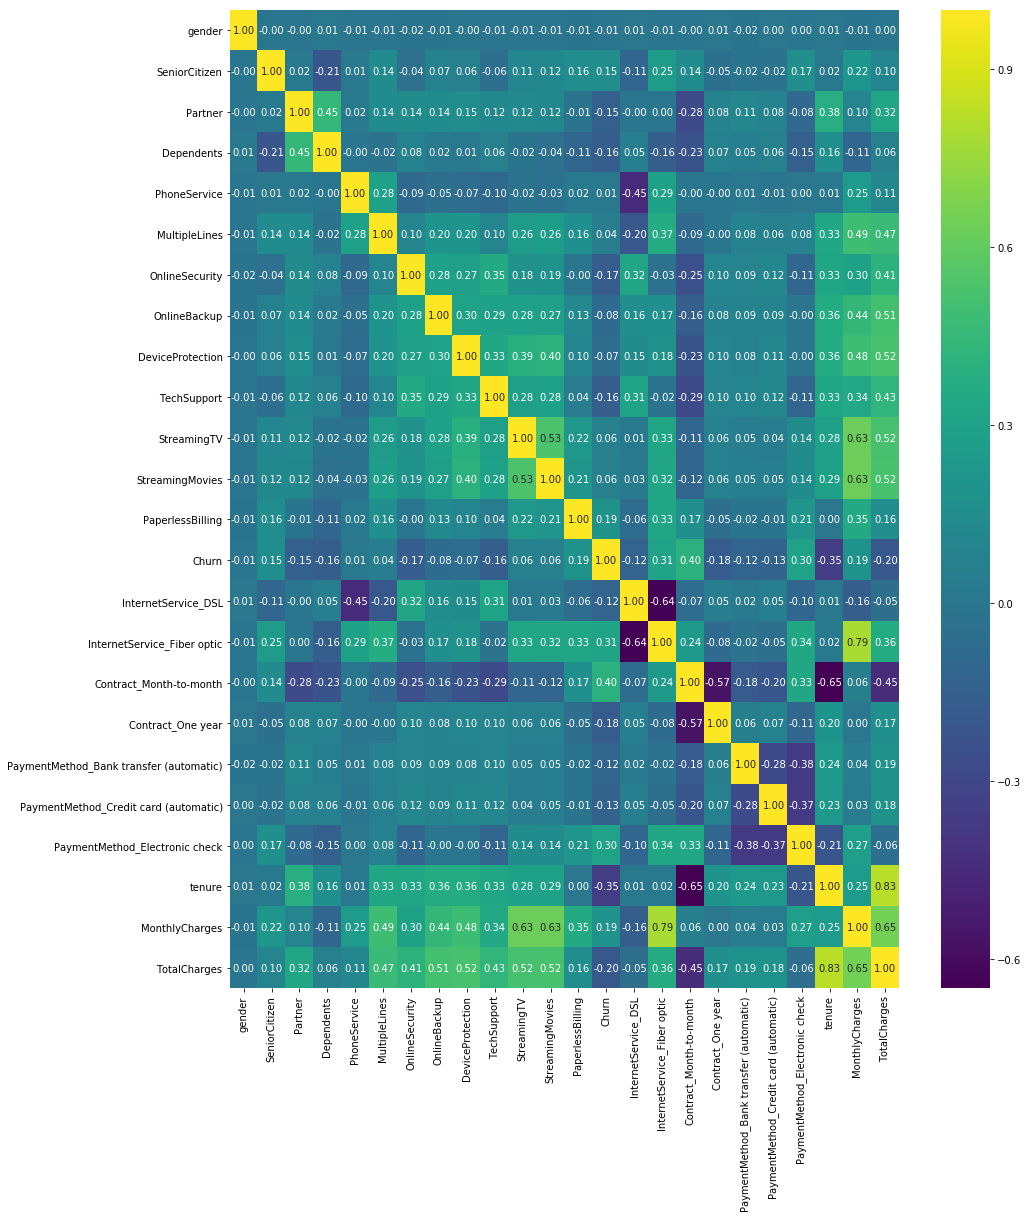

In [40]:
corr = df.corr()
plt.figure(figsize=(15,18))
sns.heatmap(corr, annot = True, cmap='viridis',fmt= ".2f")

### MODEL BUILDING

#####  Test Train split

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Churn"])
Y = df["Churn"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 0)

##### BASE MODEL LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs' ,random_state = 0)
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
y_pred = lr.predict(X_test)


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round( precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


result = pd.DataFrame([["Linear Regression",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])

result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522


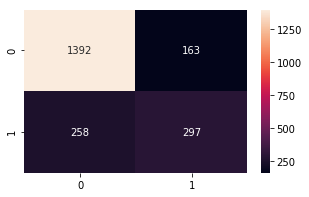

In [45]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot = True,fmt ="g")

##### BALANCING TRAINING SET

In [46]:
Y_train.value_counts()/len(Y_train) *100

0    73.303535
1    26.696465
Name: Churn, dtype: float64

In [47]:
import random
pos_index = Y_train[Y_train.values == 1].index # naming positive index
neg_index = Y_train[Y_train.values == 0].index # naming negative index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher , size= len(lower))
lower = np.asarray(lower)
new_indexes=np.concatenate((lower ,higher))

X_train = X_train.loc[new_indexes,]
Y_train= Y_train[new_indexes]

print(Y_train.value_counts()/len(Y_train) *100)

1    50.0
0    50.0
Name: Churn, dtype: float64


##### LOGISTIC REGRESSION WITH BALANCED CLASS

In [48]:
from sklearn.linear_model import LogisticRegression

lr_b = LogisticRegression(solver ='lbfgs',random_state = 0)
lr_b.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_pred = lr_b.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["Linear Regression(Balanced)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102


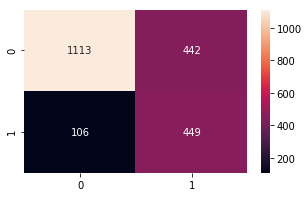

In [51]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot = True,fmt ="g")

In [ ]:
plt.figure(figsize=(5,5))
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### CROSS VALIDATION


In [52]:
from sklearn.model_selection import cross_val_score

accuracies  = cross_val_score(estimator = lr_b,X = X_train,y = Y_train,cv =10)

accuracies

array([0.75      , 0.79166667, 0.74621212, 0.78409091, 0.75572519,
       0.76335878, 0.79007634, 0.75572519, 0.7480916 , 0.76335878])

In [53]:
accuracies.mean()

0.7648305574832291

##### FEATURE SELECTION

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [54]:
from sklearn.feature_selection import RFE

# Model to test
classifier=LogisticRegression(solver = "lbfgs",random_state = 0) 
rfe = RFE(classifier,10)# chooing 20 columns from the trian set
rfe = rfe.fit(X_train, Y_train)

# summerize the selection process
print(rfe.support_)  
# True resent the column that is selected

# printing the names of the 20 columns

print(X_train.columns[rfe.support_])

# we can aslo see the ranking of columns
rfe.ranking_ # all ones are the columns that are selcted (20 columns) rest are ranked according to priority 1-9

ranking_result = pd.DataFrame([[rfe.support_,X_train.columns[rfe.support_],rfe.ranking_]],columns = ["RFE_SUPPORT","COLUMN","RANKING"])
ranking_result

[False False False False  True False  True False False False False False
  True  True  True  True  True False False  True  True False  True]
Index(['PhoneService', 'OnlineSecurity', 'PaperlessBilling',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year',
       'PaymentMethod_Electronic check', 'tenure', 'TotalCharges'],
      dtype='object')


,RFE_SUPPORT,COLUMN,RANKING
0,"[False, False, False, False, True, False, True...","Index(['PhoneService', 'OnlineSecurity', 'Pape...","[11, 2, 10, 14, 1, 6, 1, 4, 9, 5, 12, 13, 1, 1..."


In [55]:
lr_rfe=LogisticRegression(solver = "liblinear",random_state=0)

lr_rfe.fit(X_train[X_train.columns[rfe.support_]],Y_train)




y_pred=lr_rfe.predict(X_test[X_test.columns[rfe.support_]])



from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["Linear Regression(RFE)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result





,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277


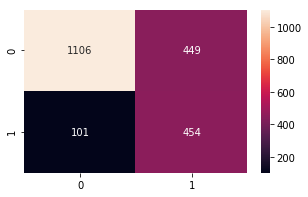

In [56]:
plt.figure(figsize=(5,3))

# creating confusion matrix 
cm=confusion_matrix(Y_test,y_pred)  # this is an array
sns.heatmap(cm,annot=True,fmt="g")

##### SUPPORT VECTOR MACHINE

In [57]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane


svc_linear = SVC(gamma = "auto",random_state = 0 , kernel = "linear")
svc_linear.fit(X_train[X_train.columns[rfe.support_]],Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
y_pred =svc_linear.predict(X_test[X_test.columns[rfe.support_]])
cm = confusion_matrix(Y_test, y_pred)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["SVM(LINEAR)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result


,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277
3,SVM(LINEAR),70.237,46.368,83.964,59.744


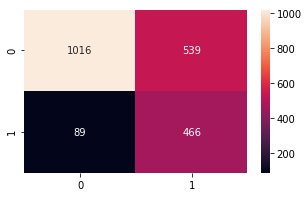

In [60]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt="g")

##### SVM RBF

In [61]:
#Support vector classifier
#using non-linear hyper plane("rbf")

svc_RBF = SVC(gamma = "auto",random_state = 0 , kernel = "rbf")
svc_RBF.fit(X_train[X_train.columns[rfe.support_]],Y_train)

y_pred =svc_RBF.predict(X_test[X_test.columns[rfe.support_]])



from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["SVM(RBF)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277
3,SVM(LINEAR),70.237,46.368,83.964,59.744
4,SVM(RBF),75.024,51.628,80.000,62.756


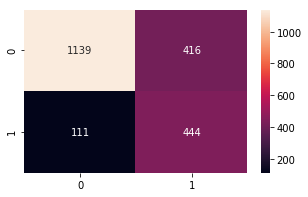

In [62]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="g")

##### NAIVE BAYES

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(priors=None)
nb.fit(X_train[X_train.columns[rfe.support_]],Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_pred =nb.predict(X_test[X_test.columns[rfe.support_]])



acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["NAIVE BAYES",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277
3,SVM(LINEAR),70.237,46.368,83.964,59.744
4,SVM(RBF),75.024,51.628,80.000,62.756
5,NAIVE BAYES,69.716,45.858,83.784,59.273


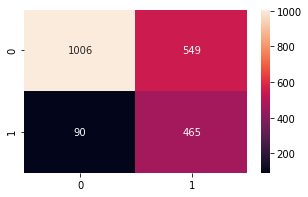

In [65]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="g")

##### KNN CLASSIFIER 

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train[X_train.columns[rfe.support_]],Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
y_pred =nb.predict(X_test[X_test.columns[rfe.support_]])



acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["KNN",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277
3,SVM(LINEAR),70.237,46.368,83.964,59.744
4,SVM(RBF),75.024,51.628,80.000,62.756
5,NAIVE BAYES,69.716,45.858,83.784,59.273
6,KNN,69.716,45.858,83.784,59.273


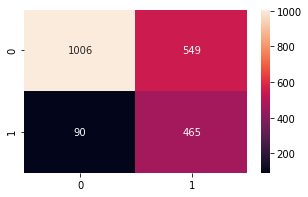

In [69]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="g")

##### DECISION TREE 

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()       

In [71]:
dt.fit(X_train[X_train.columns[rfe.support_]],Y_train)
y_pred = dt.predict(X_test[X_test.columns[rfe.support_]])

In [72]:
acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


model_result = pd.DataFrame([["DECISION TREE",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277
3,SVM(LINEAR),70.237,46.368,83.964,59.744
4,SVM(RBF),75.024,51.628,80.000,62.756
5,NAIVE BAYES,69.716,45.858,83.784,59.273
6,KNN,69.716,45.858,83.784,59.273
7,DECISION TREE,68.483,43.943,71.892,54.545


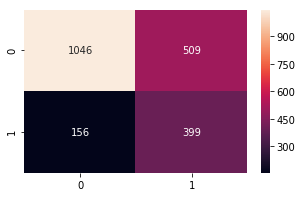

In [73]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="g")

##### RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train[X_train.columns[rfe.support_]],Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
y_pred = rf.predict(X_test[X_test.columns[rfe.support_]])

In [76]:
acc = round(accuracy_score(Y_test,y_pred)*100,3)


prec = round(precision_score(Y_test,y_pred)*100,3)


rec =  round(recall_score(Y_test,y_pred)*100,3)


f1 =  round(f1_score(Y_test,y_pred)*100,3)


print("Accuracy score is:",acc,"%","\n")  # accuracy_score(Y_test,y_pred) 


print("Precision score is: ",prec,"%","\n") # precision_score(Y_test,y_pred)

print("Recall score is : ",rec ,"%","\n")


print("f1 score is :",f1,"%")

Accuracy score is: 71.659 % 

Precision score is:  47.52 % 

Recall score is :  74.234 % 

f1 score is : 57.947 %


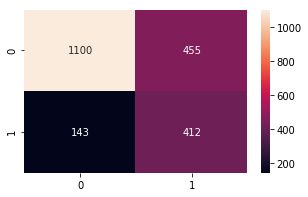

In [77]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="g")

In [78]:
model_result = pd.DataFrame([["RANDOM FOREST",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])
result = result.append(model_result,ignore_index = True)
result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression,80.047,64.565,53.514,58.522
1,Linear Regression(Balanced),74.028,50.393,80.901,62.102
2,Linear Regression(RFE),73.934,50.277,81.802,62.277
3,SVM(LINEAR),70.237,46.368,83.964,59.744
4,SVM(RBF),75.024,51.628,80.000,62.756
5,NAIVE BAYES,69.716,45.858,83.784,59.273
6,KNN,69.716,45.858,83.784,59.273
7,DECISION TREE,68.483,43.943,71.892,54.545
8,RANDOM FOREST,71.659,47.520,74.234,57.947


In [ ]:
# Formatting Final Results

#final_results = pd.concat([Y_test, user_id], axis = 1).dropna()
#final_results['predictions'] = y_pred
#final_results = final_results[['entry_id', 'e_signed', 'predictions']]